In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [3]:
f_data = pd.read_csv('Resources/data.csv', index_col = [0], squeeze= True, parse_dates=True)
series_value = f_data.values
type(series_value)

numpy.ndarray

<AxesSubplot:xlabel='Etiquetas de fila'>

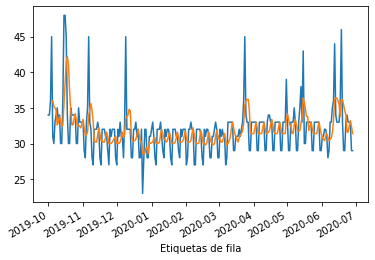

In [5]:
f_mean = f_data.rolling(window=5).mean()
f_data.plot()
f_mean.plot()

In [7]:
value = pd.DataFrame(series_value)
data_df = pd.concat([value,value.shift(1)],axis=1)
data_df.columns = ['t','t1']
data_test = data_df[1:]
data_error = mean_squared_error(data_test.t,data_test.t1)
np.sqrt(data_error)

3.6533566655027174

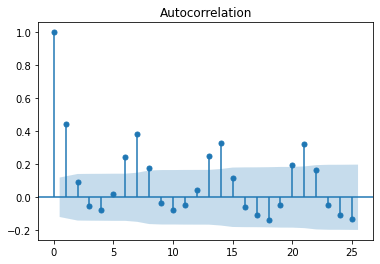

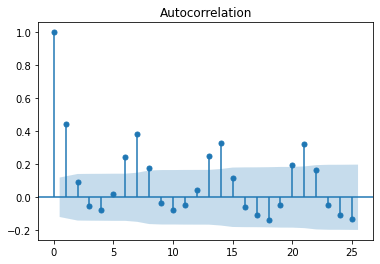

In [9]:
plot_acf(f_data) # identificar el valor de Q

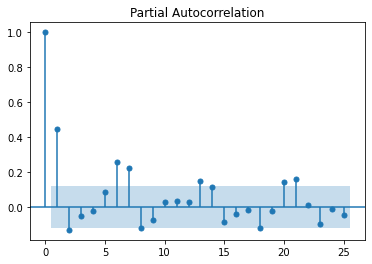

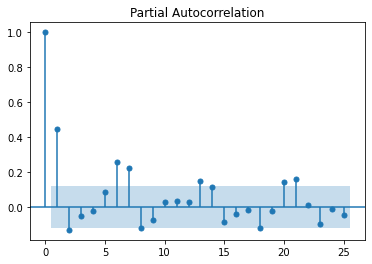

In [8]:
plot_pacf(f_data) #Identificar el valor de P

In [10]:
# P = 2
# D = 0 no hay estacionarios
# Q = 3 
f_data.size

269

In [11]:
data_train = f_data[0:260]
data_test = f_data[260:269]
data_train.size


260

In [12]:
data_test.size

9

In [33]:
data_model = ARIMA(data_train, order=(5,0,2))

c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [34]:
data_model_fit = data_model.fit()

c:\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
data_model_fit.aic

1304.253320075533

In [36]:
data_forecast = data_model_fit.forecast(steps = 9)

c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [37]:
type(data_forecast)

pandas.core.series.Series

In [38]:
data_forecast

260    31.620572
261    31.759457
262    30.535108
263    32.370172
264    34.674448
265    34.921872
266    33.346578
267    31.046545
268    29.610622
Name: predicted_mean, dtype: float64

In [39]:
data_test

Etiquetas de fila
2020-06-20    29
2020-06-21    29
2020-06-22    33
2020-06-23    34
2020-06-24    33
2020-06-25    33
2020-06-26    33
2020-06-27    29
2020-06-28    29
Name: Cuenta de Offered, dtype: int64

In [40]:
np.sqrt(mean_squared_error(data_test,data_forecast))

1.9548437081887438

In [41]:
data_forecast.to_csv('Resources/output.csv')